In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/veri-madenciligi-veriseti/drugsComTest_raw.csv
/kaggle/input/veri-madenciligi-veriseti/drugsComTrain_raw.csv


In [39]:
df = pd.read_csv("/kaggle/input/veri-madenciligi-veriseti/drugsComTrain_raw.csv")
test = pd.read_csv("/kaggle/input/veri-madenciligi-veriseti/drugsComTest_raw.csv")
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [40]:
# iki veri seti de ayni sutunlari icerdigi icin daha iyi sonuc almak amaciyla birlestirebiliriz.

data = pd.concat([df, test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [41]:
# veri setini describe

data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [42]:
# veri seti info

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [43]:
# veri NULL deger iceriyor mu kontrolu

data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

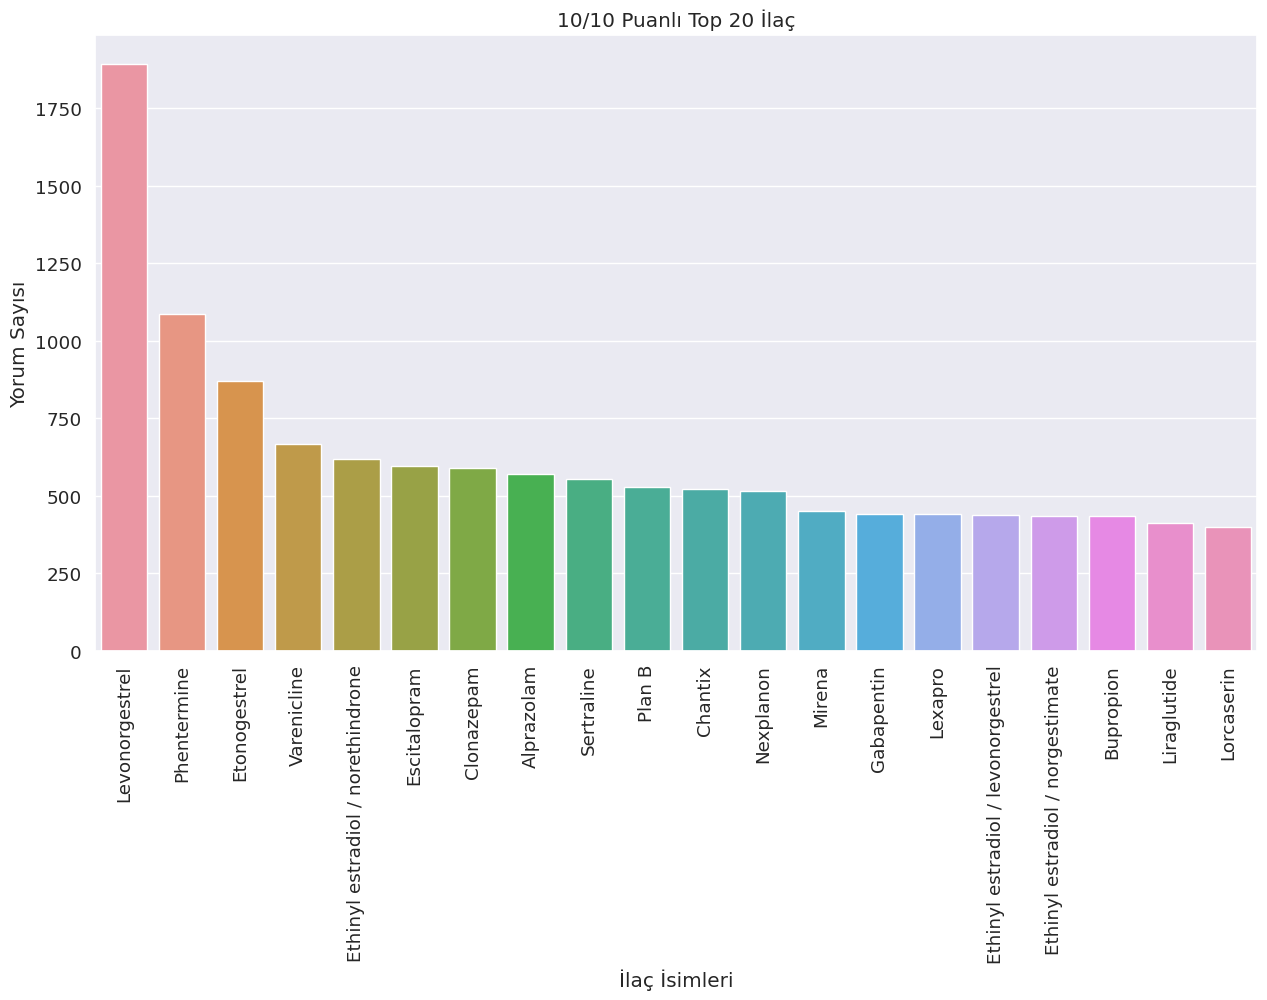

In [44]:
# bu barplot, 10/10 rating almis top 20 ilaci gosteriyor

sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('10/10 Puanlı Top 20 İlaç')
sns_rating.set_ylabel("Yorum Sayısı")
sns_rating.set_xlabel("İlaç İsimleri")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

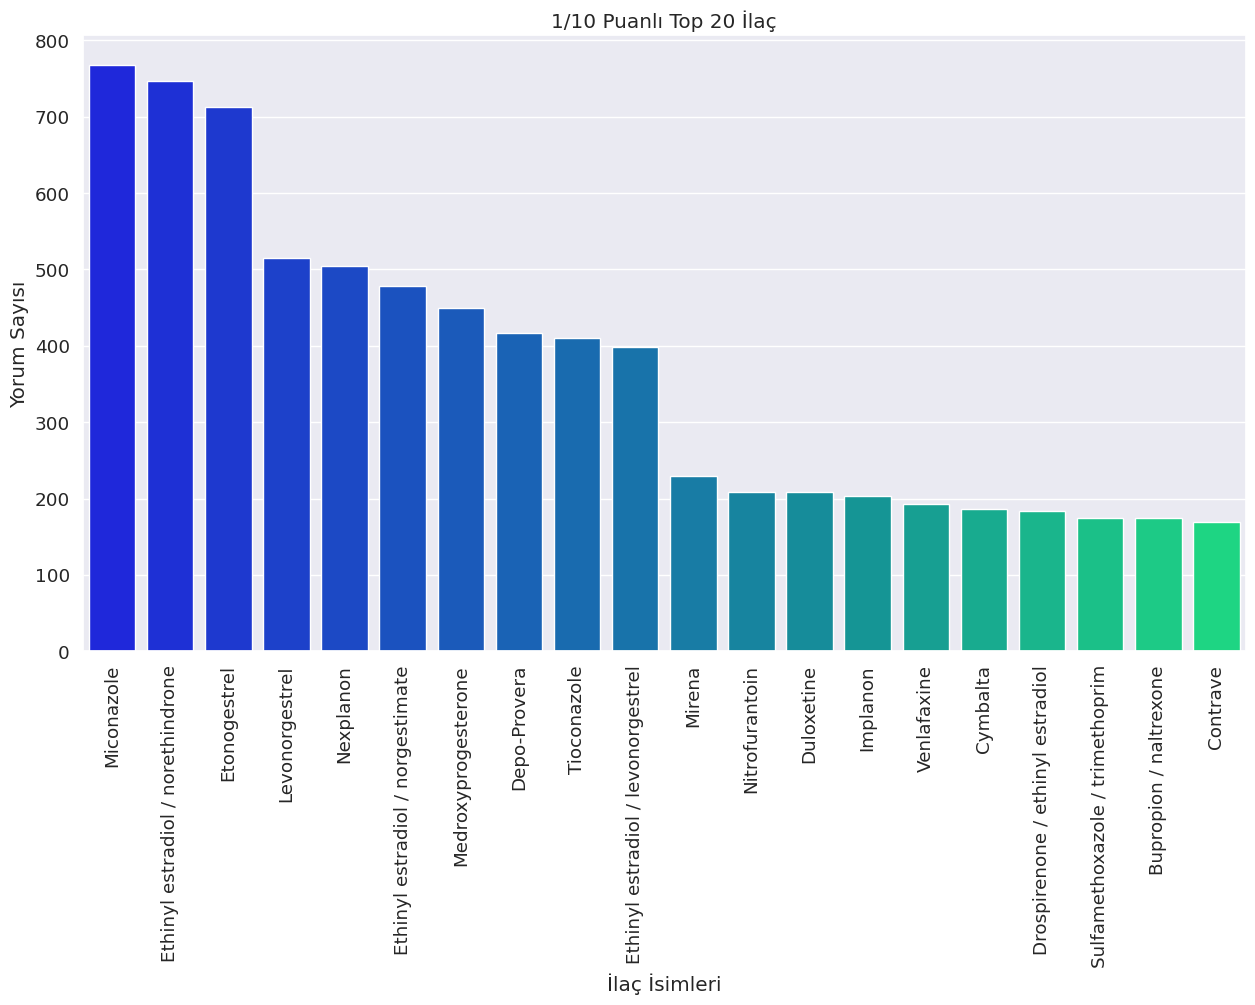

In [45]:
# bu barplot, 1/10 rating almis top 20 ilaci gosteriyor

sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('1/10 Puanlı Top 20 İlaç')
sns_rating.set_ylabel("Yorum Sayısı")
sns_rating.set_xlabel("İlaç İsimleri")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

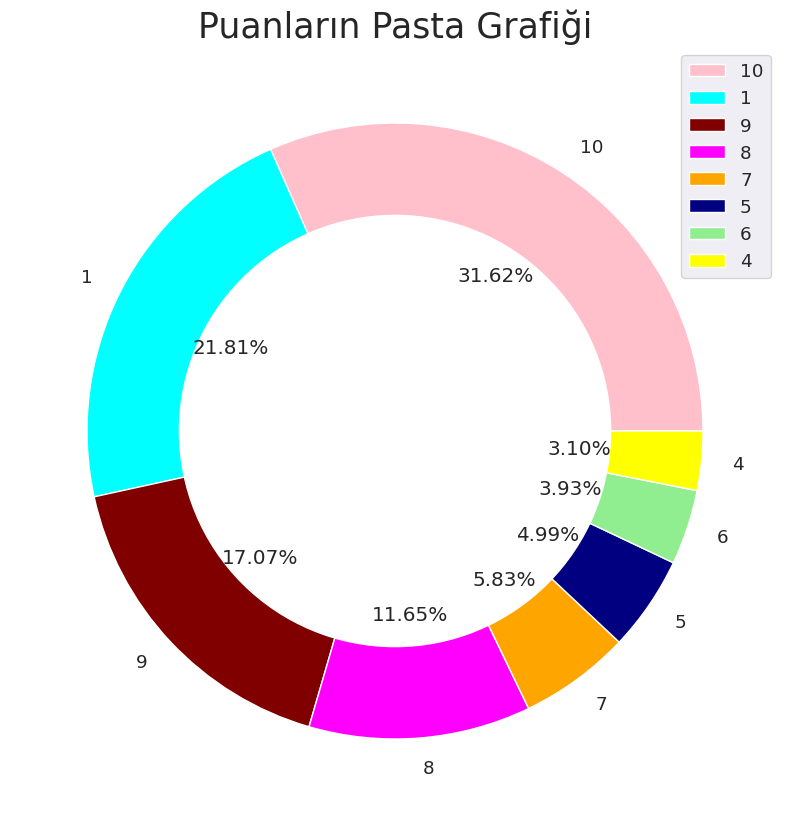

In [46]:
# her rating'in payini belirtmek icin bir pie chart

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Puanların Pasta Grafiği', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

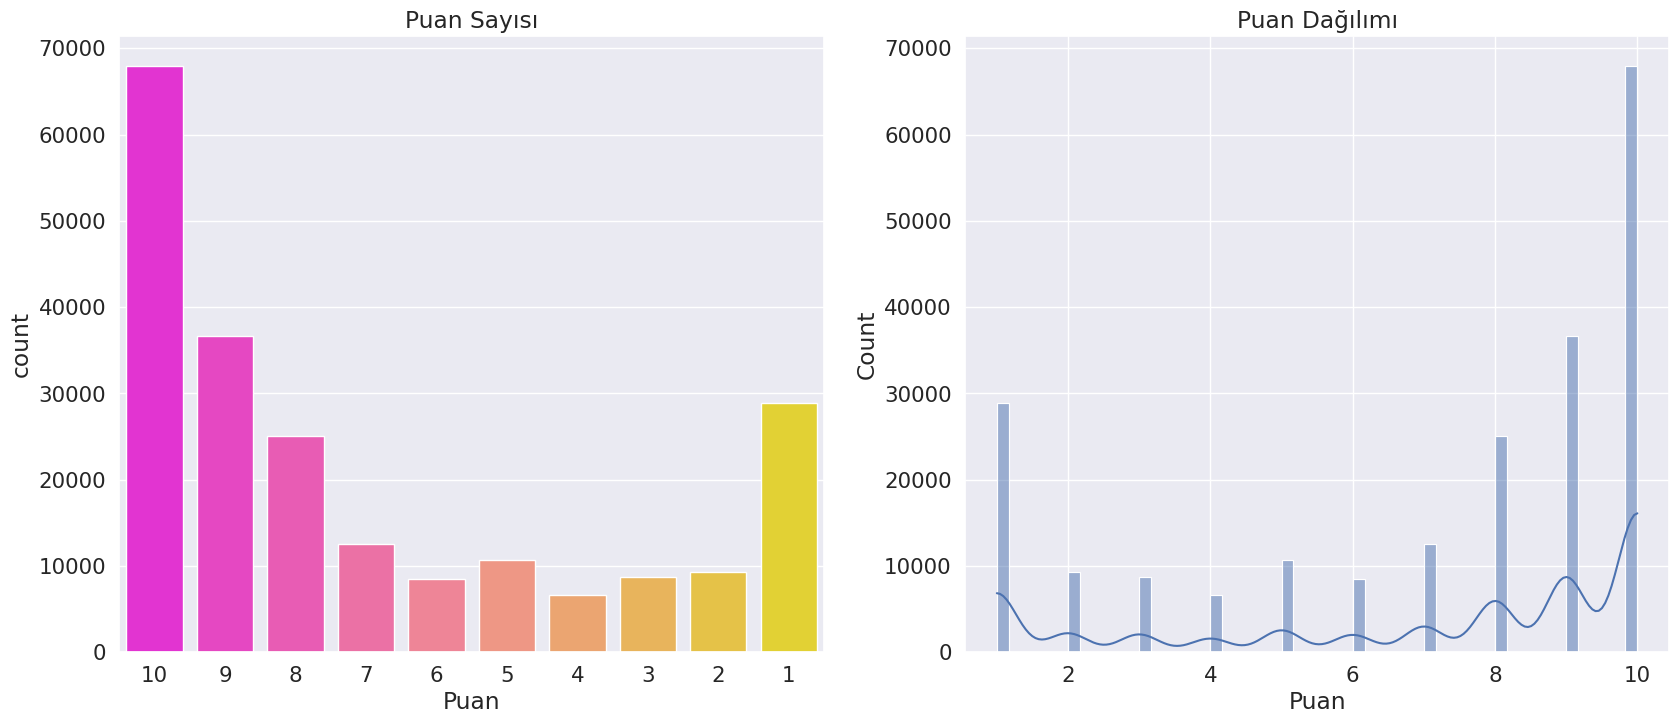

In [47]:
# rating dagilimi icin bir countplot

plt.rcParams['figure.figsize'] = [20, 8]

sns.set(font_scale=1.4, style='darkgrid')

fig, ax = plt.subplots(1, 2)

if isinstance(data, pd.DataFrame) and 'rating' in data.columns:
    # Countplot
    sns_1 = sns.countplot(x='rating', data=data, palette='spring', order=list(range(10, 0, -1)), ax=ax[0])
    sns_1.set_title('Puan Sayısı')
    sns_1.set_xlabel("Puan")

    # Histplot for distribution (instead of deprecated distplot)
    sns_2 = sns.histplot(data['rating'], kde=True, ax=ax[1])
    sns_2.set_title('Puan Dağılımı')
    sns_2.set_xlabel("Puan")

    plt.show()
else:
    print("Error: 'data' is not a DataFrame or 'rating' column does not exist.")


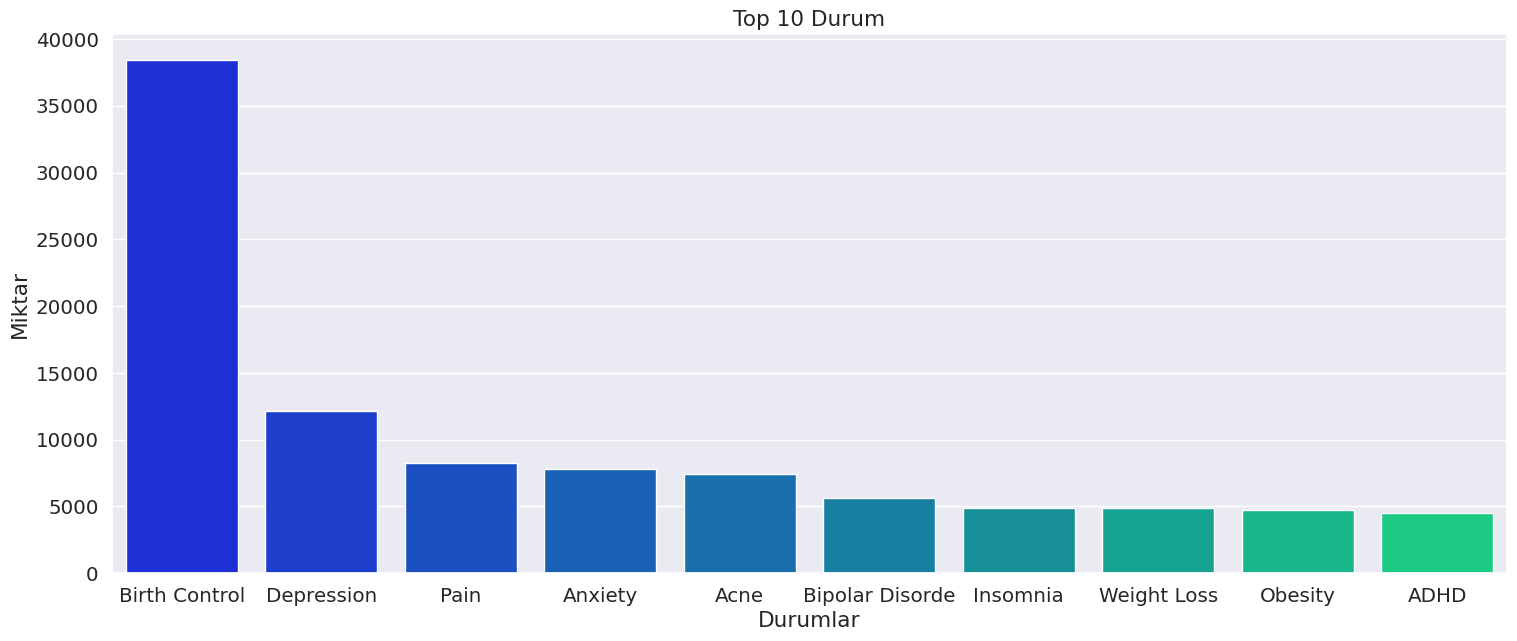

In [48]:
# top 10 hastalik icin barplot
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 Durum")
sns_.set_xlabel("Durumlar")
sns_.set_ylabel("Miktar");

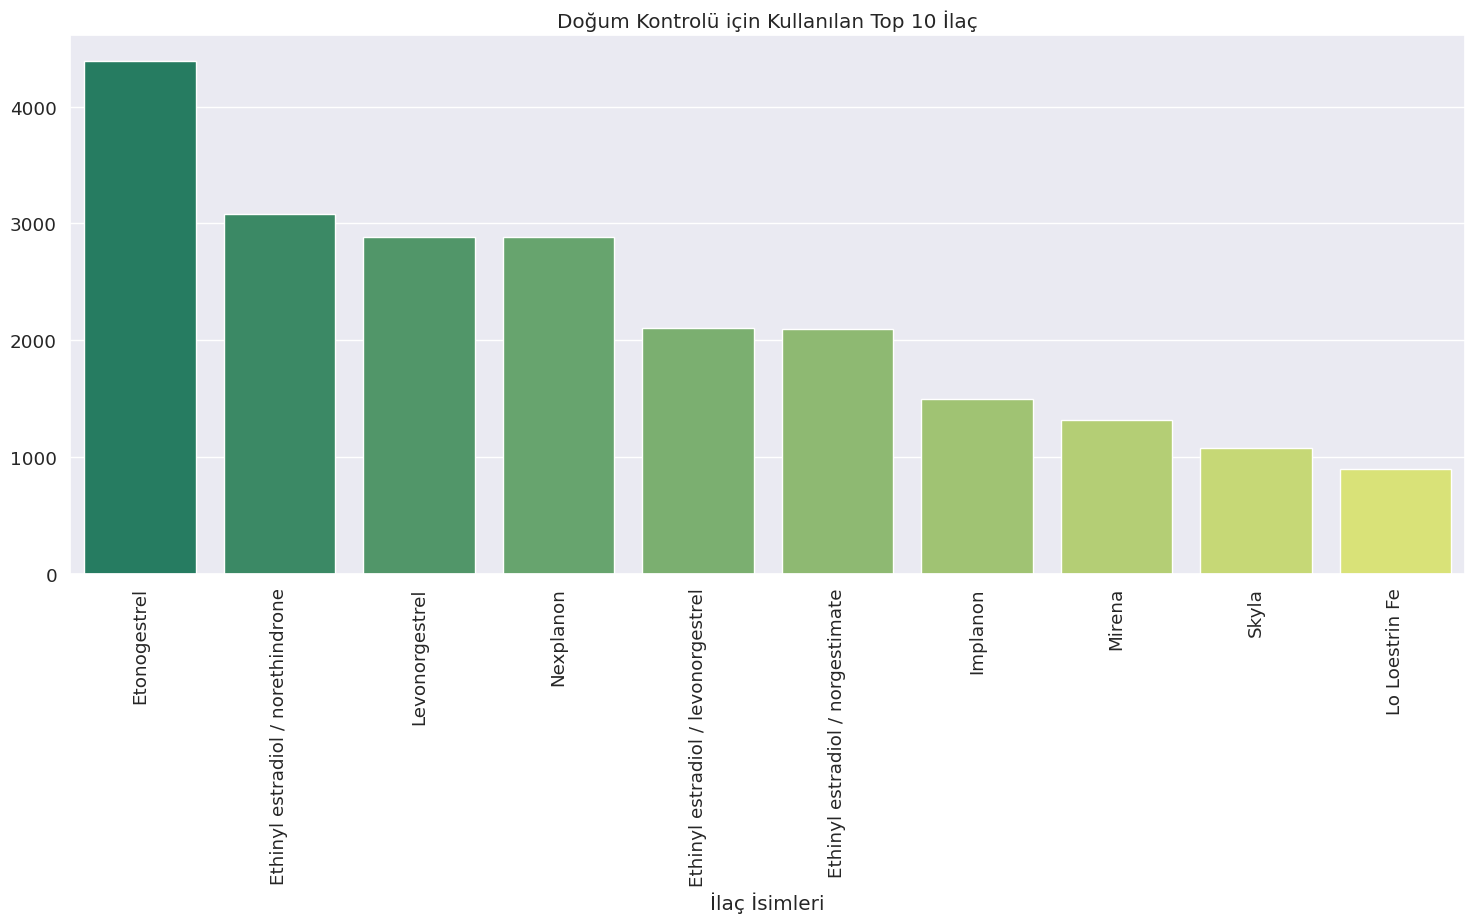

In [49]:
# dogum kontrolu icin kullanilan top 10 ilac
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('İlaç İsimleri')
sns_.set_title("Doğum Kontrolü için Kullanılan Top 10 İlaç")
plt.setp(sns_.get_xticklabels(), rotation = 90);

In [50]:
# feature engineering 
# review sentiment adında yeni bir column oluşturalım 
# 5 ve 5'ten büyük rating'ler 1, diğerleri 0

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

Review_Sentiment
1.0    161491
0.0     53572
Name: count, dtype: int64

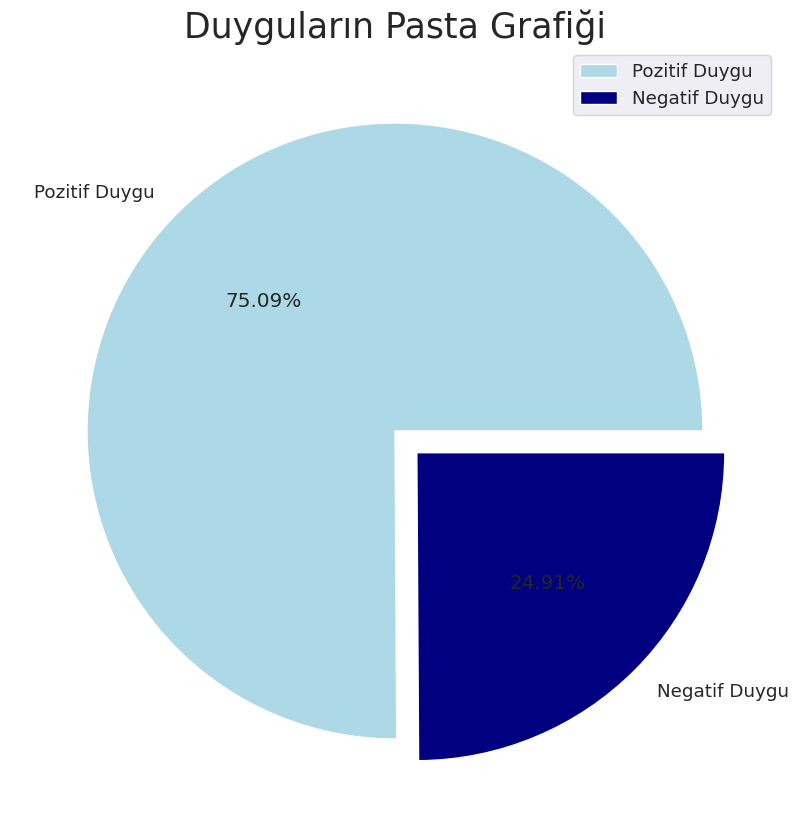

In [51]:
# kullanici duygusunu görselleştirmek için bir pie chart

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Pozitif Duygu","Negatif Duygu"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Duyguların Pasta Grafiği', fontsize = 25)
plt.legend()
plt.show()

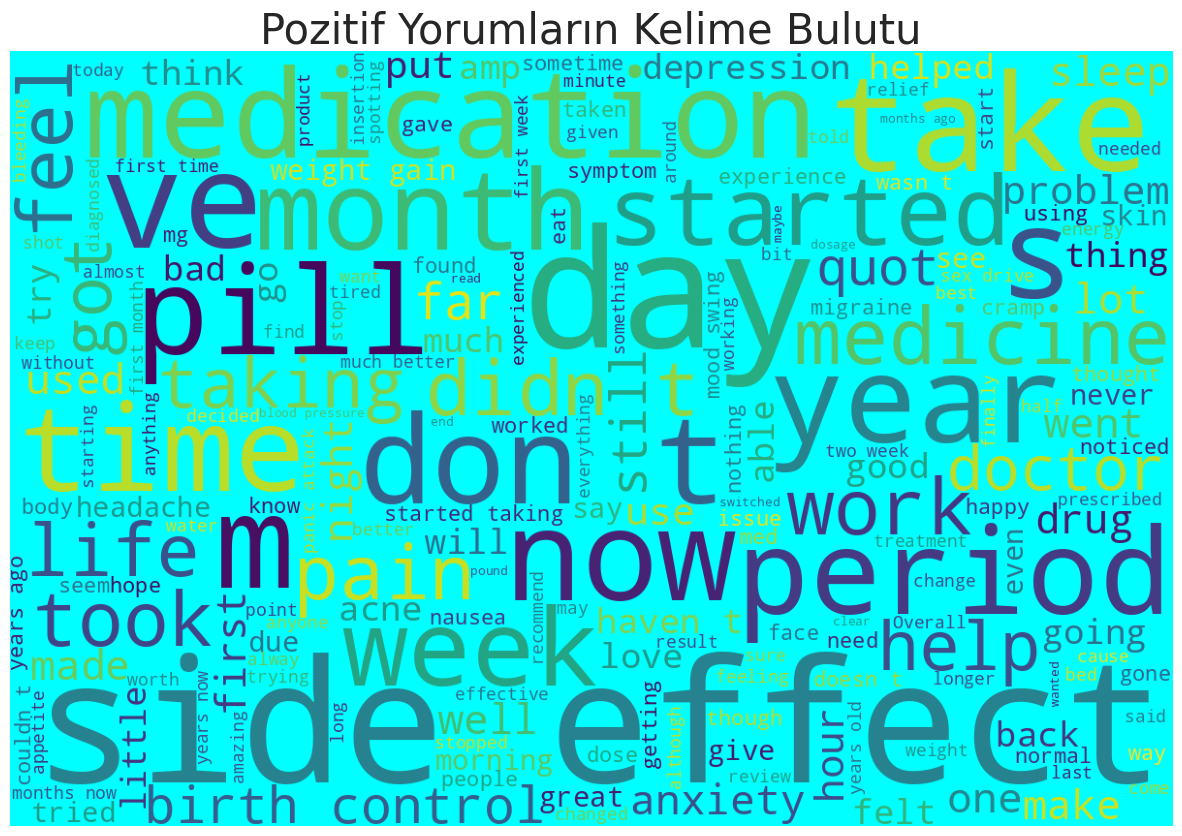

In [52]:
# pozitif yorumlar icin bir word cloud

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Pozitif Yorumların Kelime Bulutu', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

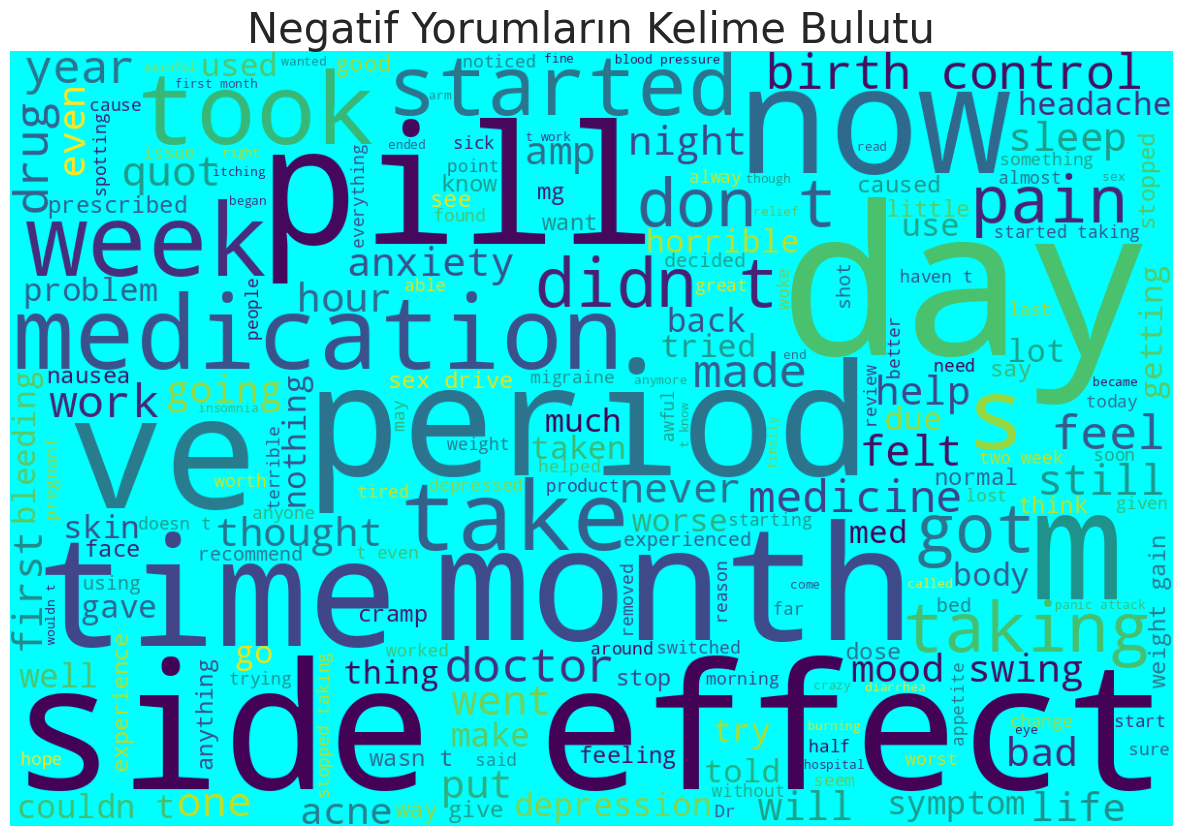

In [53]:
# negatif yorumlar için bir word cloud

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Negatif Yorumların Kelime Bulutu', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [54]:
# tarihi datetime formatına çevirme
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# yılı alma
data['Year'] = data['date'].dt.year

# ayı alma
data['month'] = data['date'].dt.month

# günü alma
data['day'] = data['date'].dt.day

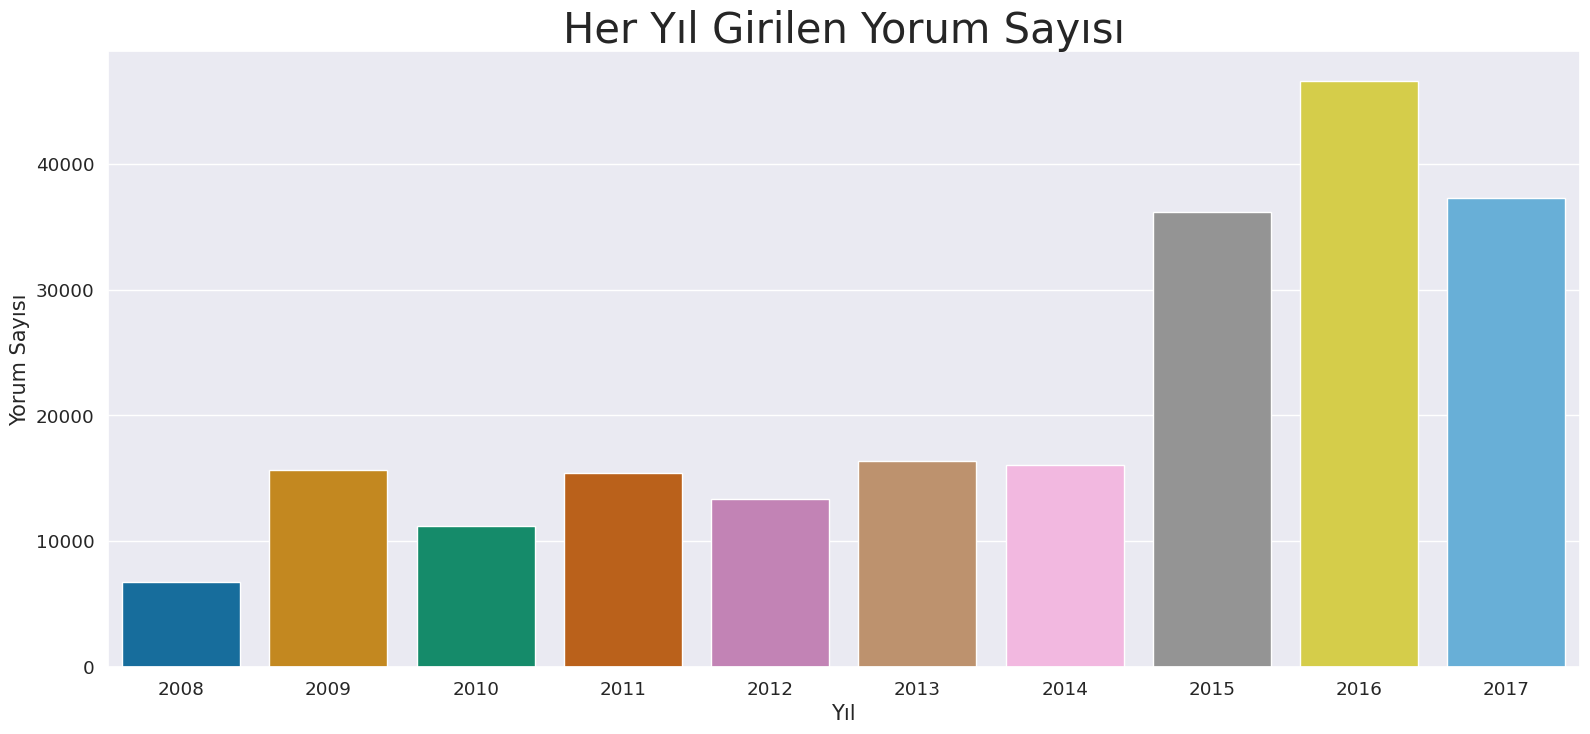

In [55]:
#her yıl kaç yorum yazıldığı için bar grafiği
plt.rcParams['figure.figsize'] = (19, 8)

if isinstance(data, pd.DataFrame) and 'Year' in data.columns:
    # countplot
    sns.countplot(x='Year', data=data, palette='colorblind')
    plt.title('Her Yıl Girilen Yorum Sayısı', fontsize=30)
    plt.xlabel('Yıl', fontsize=15)
    plt.ylabel('Yorum Sayısı', fontsize=15)
    plt.show()
else:
    print("Error: 'data' is not a DataFrame or 'Year' column does not exist.")

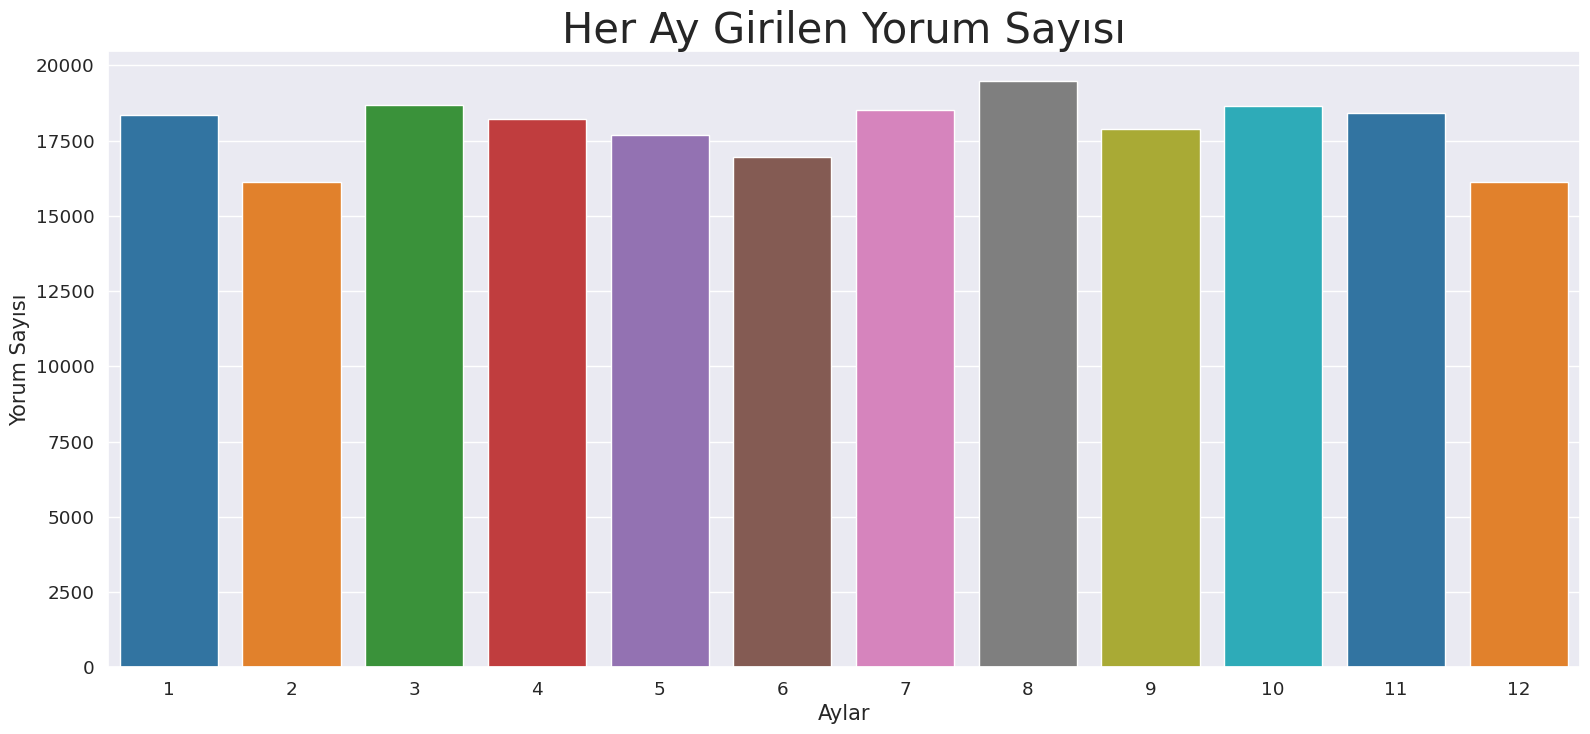

In [56]:
#her ay yapılan yorum sayısı
plt.rcParams['figure.figsize'] = (19, 8)

# Check if data is a DataFrame and the 'month' column exists
if isinstance(data, pd.DataFrame) and 'month' in data.columns:
    # Countplot
    sns.countplot(x='month', data=data, palette='tab10')
    plt.title('Her Ay Girilen Yorum Sayısı', fontsize=30)
    plt.xlabel('Aylar', fontsize=15)
    plt.ylabel('Yorum Sayısı', fontsize=15)
    plt.show()
else:
    print("Error: 'data' is not a DataFrame or 'month' column does not exist.")

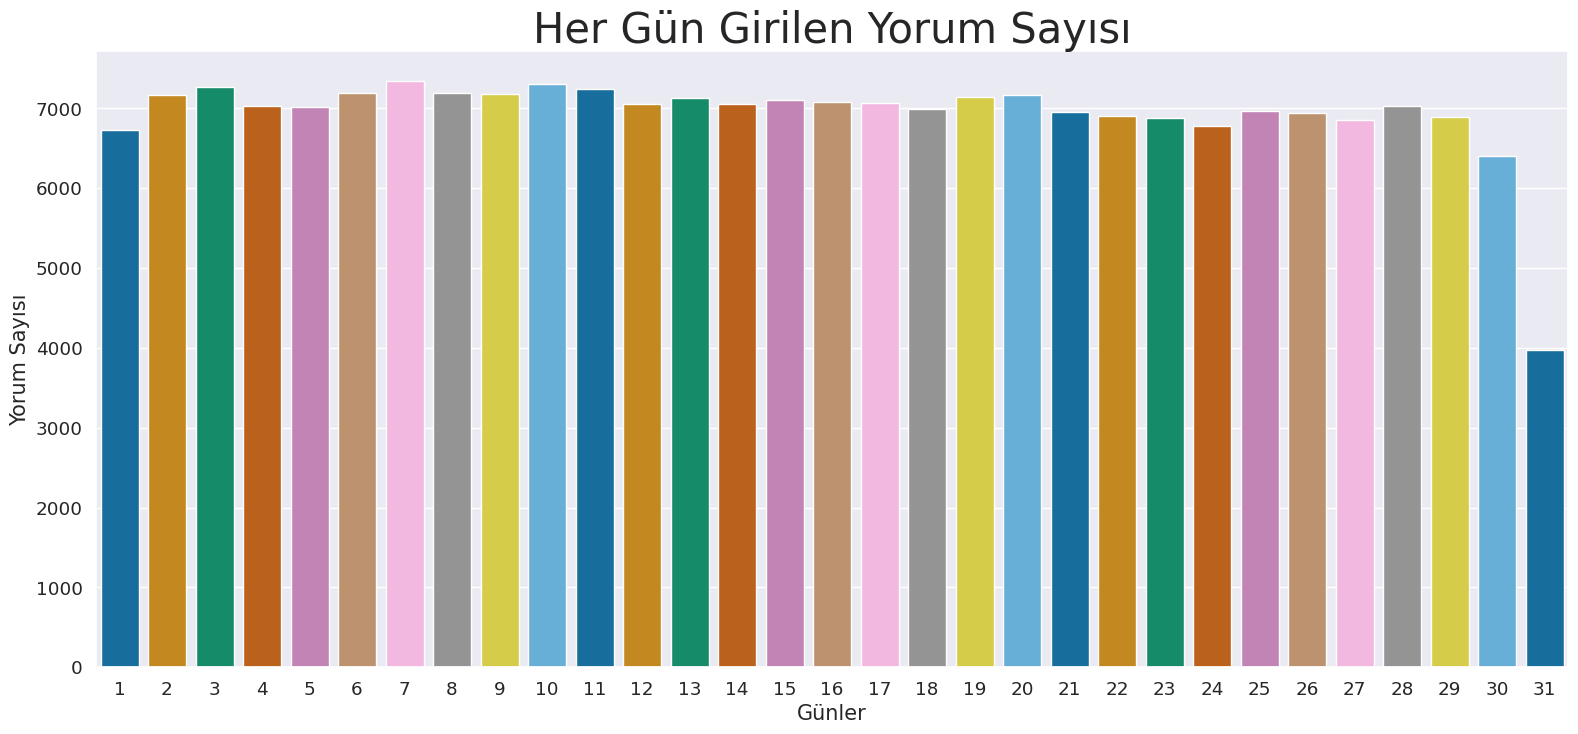

In [57]:
#her gün ne kadar yorum girildiği
plt.rcParams['figure.figsize'] = (19, 8)

# Check if data is a DataFrame and the 'day' column exists
if isinstance(data, pd.DataFrame) and 'day' in data.columns:
    # Countplot
    sns.countplot(x='day', data=data, palette='colorblind')
    plt.title('Her Gün Girilen Yorum Sayısı', fontsize=30)
    plt.xlabel('Günler', fontsize=15)
    plt.ylabel('Yorum Sayısı', fontsize=15)
    plt.show()
else:
    print("Error: 'data' is not a DataFrame or 'day' column does not exist.")

In [58]:
def review_clean(review): 
    # hepsini küçük harf yapma
    lower = review.str.lower()
    
    # tekrar eden &#039; pattern'inin silinmesi
    pattern_remove = lower.str.replace("&#039;", "")
    
    # tüm özel karakterlerin silinmesi
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # ASCII tablosunda olmayan karakterlerin silinmesi
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # whitespace'lerin silinmesi
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # birden fazla space basılmışsa tek space'e indirilmesi
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # iki veya daha fazla .(nokta) varsa tek noktaya indirilmesi
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [59]:
data['review_clean'] = review_clean(data['review'])

In [60]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# stopword'lerin silinmesi
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [61]:
# snowball stemmer kullanılarak kelimelerin köklerine ayrılması
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [62]:
data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,"""it side effect, take combin bystol 5 mg fish ..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,"""mi son halfway fourth week intuniv. becam con..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,"""i use take anoth oral contraceptive, 21 pill ..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3,"""this first time use form birth control. im gl..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27,"""suboxon complet turn life around. feel health..."
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,0.0,2015,11,28,"""2nd day 5mg start work rock hard erect howev ..."
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,2017-03-07,5,0.0,2017,3,7,"""he pull out, cum bit me. took plan b 26 hour ..."
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,2015-03-14,32,1.0,2015,3,14,"""abilifi chang life. hope. zoloft clonidin fir..."
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,2016-08-09,11,0.0,2016,8,9,""" noth problem keppera : constant shake arm &a..."
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,2016-12-08,1,1.0,2016,12,8,"""i pill mani years. doctor chang rx chateal, e..."


In [63]:
def sentiment(review):
    # yorumların sentiment polarity'si
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [64]:
data['sentiment'] = sentiment(data['review'])

In [65]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [66]:
# yorumları stop word'leri kaldırmadan snowball stemmer kullanarak temizleme
data['review_clean_ss'] = review_clean(data['review'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [67]:
data = data.dropna(how="any", axis=0)

In [68]:
#her yorumdaki kelime sayısı
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#unique kelime sayısı
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#harf sayısı
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#noktalama işareti sayısı
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#büyük harfli kelime sayısı
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#başlık kelime sayısı
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#stopword sayısı
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#kelimelerin ortalam özellikleri 
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [69]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'month', 'day',
       'review_clean', 'sentiment', 'sentiment_clean', 'review_clean_ss',
       'sentiment_clean_ss', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len'],
      dtype='object')

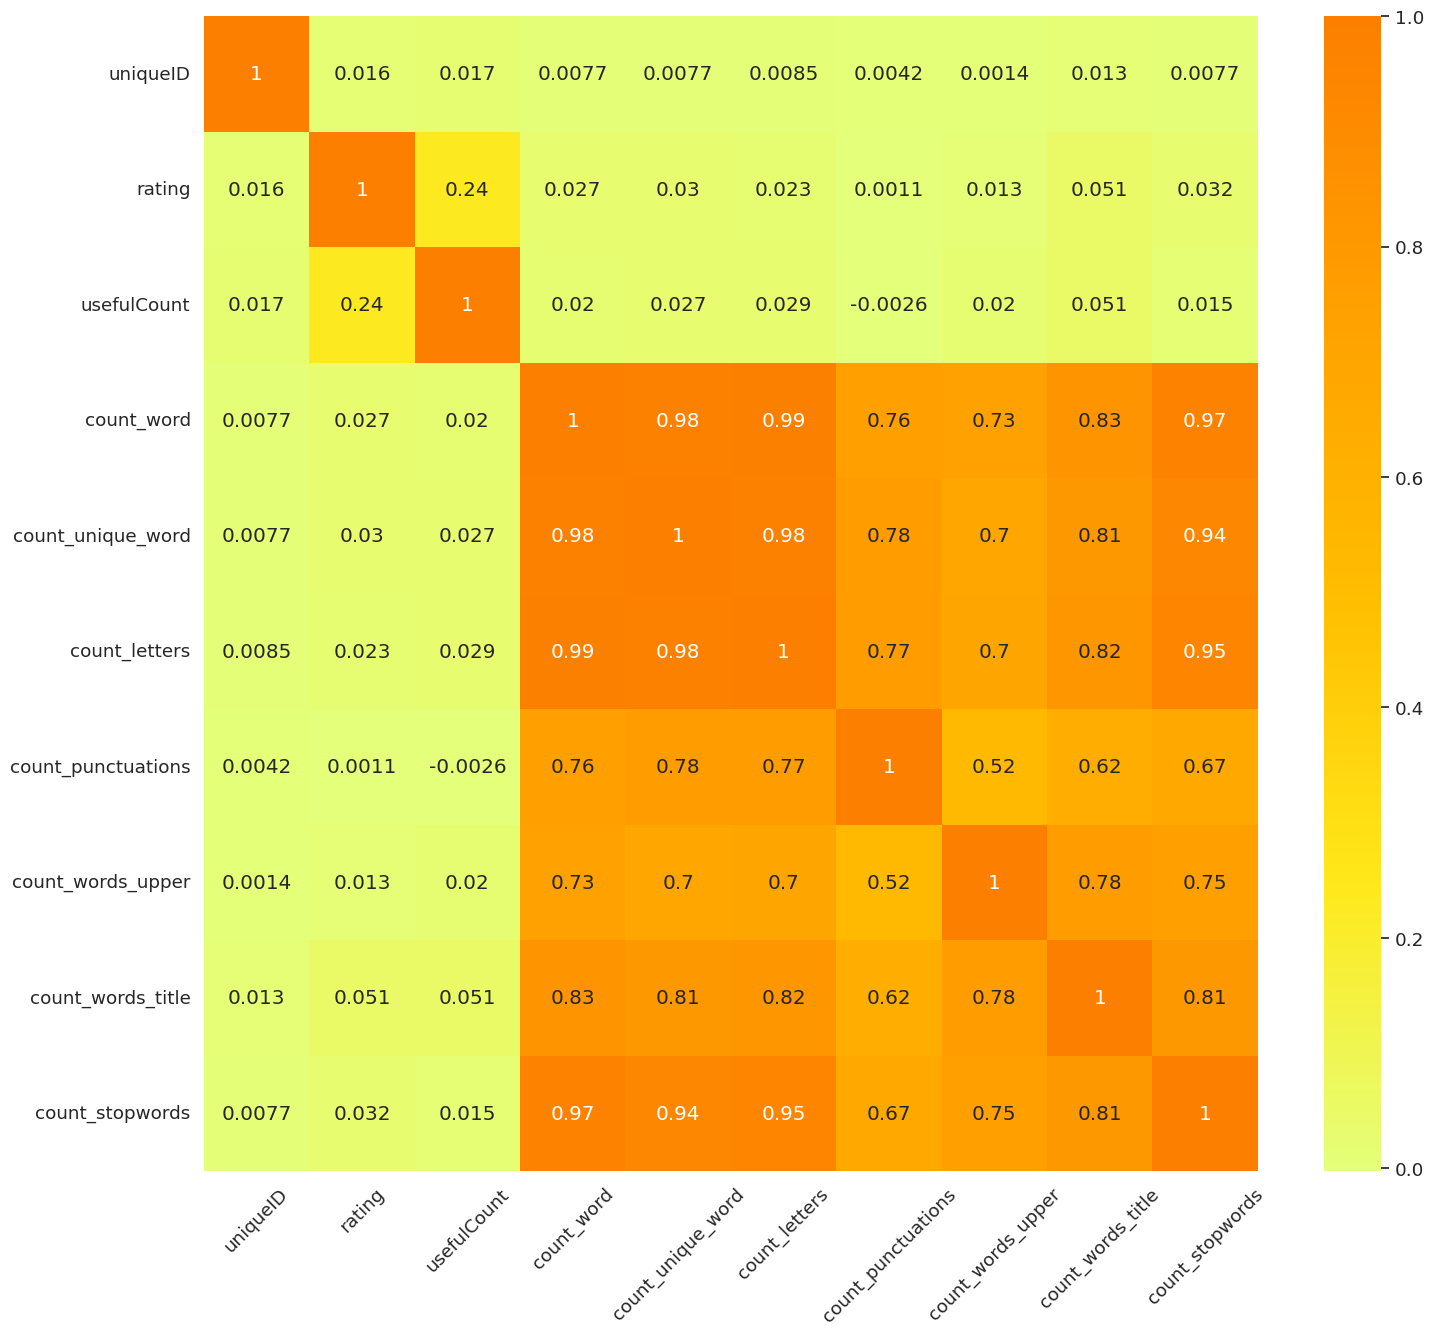

In [70]:
# feature engineering yapılan özelliklerin correltion heatmapi
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [71]:
# ilaç isimleri ve hastalıkların label encodingi
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

In [72]:
# Model için gerekli kütüphaneler
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [73]:
# Özelliklerin belirlenmesi ve verinin train - test olarak bölünmesi

features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 15)
The Test set size  (64161, 15)


In [74]:
# Model Eğitimi
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Sonuçlar
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print ("The confusion Matrix is ")
confusion_matrix(y_test, y_pred)

Accuracy: 0.9004379607549757
The confusion Matrix is 


array([[11709,  4365],
       [ 2023, 46064]])

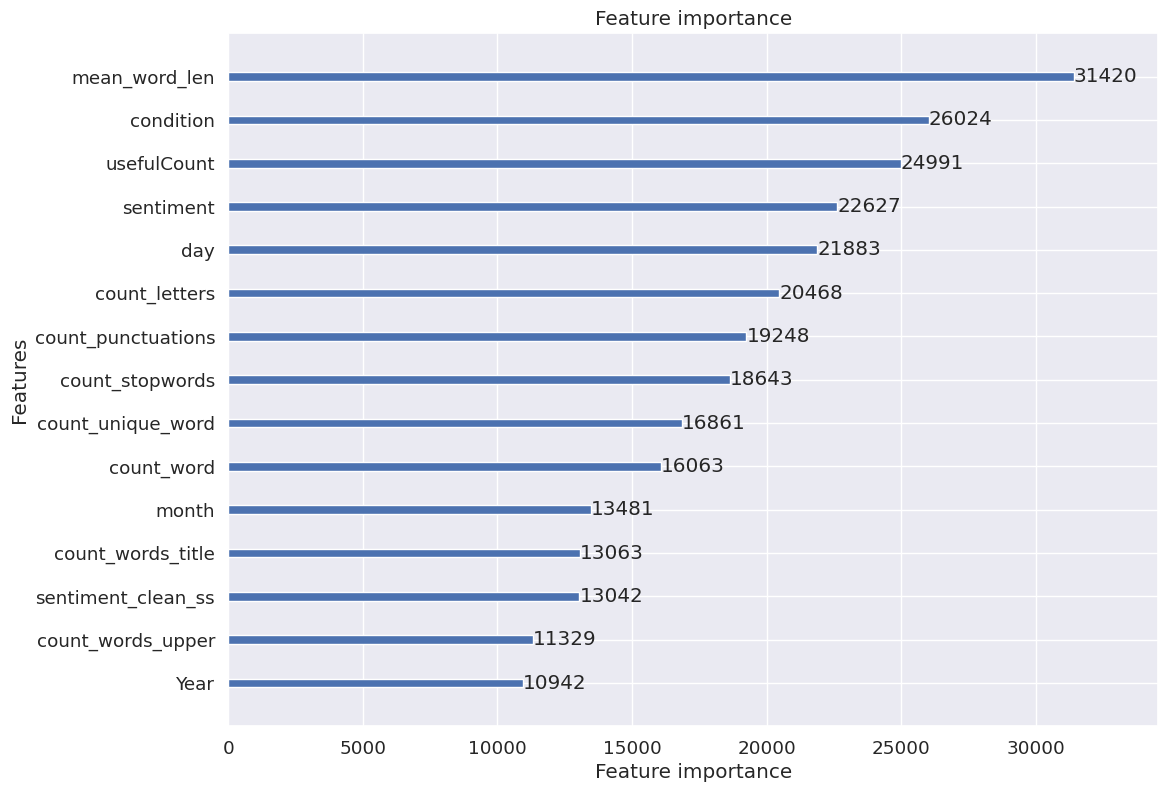

In [75]:
# LGBM ile özelliklerin önem sırası grafiği 
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

In [76]:
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,...,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,206461,3421,480,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,...,"""it has no side effect, i take it in combinati...",0.000000,17,17,79,3,1,6,7,3.705882
1,95260,1536,80,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,...,"""my son is halfway through his fourth week of ...",0.168333,141,106,741,23,2,13,69,4.248227
2,92703,1983,175,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,...,"""i used to take another oral contraceptive, wh...",0.067210,134,95,743,34,6,15,59,4.544776
3,138000,2446,175,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,...,"""this is my first time using any form of birth...",0.179545,89,57,442,15,4,9,45,3.977528
4,35696,553,593,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,...,"""suboxone has completely turned my life around...",0.194444,124,86,695,28,7,15,60,4.532258


In [77]:
# naive bayes algoritması 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                 'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                 'count_punctuations', 'count_words_upper', 'count_words_title',
                 'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print("The Train set size ", X_train.shape)
print("The Test set size ", X_test.shape)

# Gauss Naive Bayes Modeli kullanıyorum
gnb = GaussianNB()

# model fit
gnb.fit(X_train, y_train)

# tahmin sonucu alınıyor
y_pred = gnb.predict(X_test)

# model performansı değerlendirmesi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# detaylı sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# confusion matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


The Train set size  (149708, 15)
The Test set size  (64161, 15)
Accuracy: 0.7605243060426116
Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.47      0.50     16074
         1.0       0.83      0.86      0.84     48087

    accuracy                           0.76     64161
   macro avg       0.68      0.66      0.67     64161
weighted avg       0.75      0.76      0.76     64161

Confusion Matrix:
 [[ 7548  8526]
 [ 6839 41248]]


In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                 'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                 'count_punctuations', 'count_words_upper', 'count_words_title',
                 'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print("The Train set size ", X_train.shape)
print("The Test set size ", X_test.shape)

# Denenecek K değerleri
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# K değerleri üzerinde iteration yapılıyor
for k in k_values:
    # KNN algoritması
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # model fit
    knn.fit(X_train, y_train)
    
    # test verisi üzerinde prediction
    y_pred = knn.predict(X_test)
    
    # modelin performansı değerlendiliriyor
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for K={k}: {accuracy}")
    
    # detaylı sınıflandırma raporu
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for K={k}:\n", report)
    
    # conf matrisi
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for K={k}:\n", conf_matrix)


The Train set size  (149708, 15)
The Test set size  (64161, 15)
Accuracy for K=1: 0.8515141596920247
Classification Report for K=1:
               precision    recall  f1-score   support

         0.0       0.70      0.71      0.70     16074
         1.0       0.90      0.90      0.90     48087

    accuracy                           0.85     64161
   macro avg       0.80      0.80      0.80     64161
weighted avg       0.85      0.85      0.85     64161

Confusion Matrix for K=1:
 [[11348  4726]
 [ 4801 43286]]
Accuracy for K=3: 0.7236794937734761
Classification Report for K=3:
               precision    recall  f1-score   support

         0.0       0.44      0.38      0.41     16074
         1.0       0.80      0.84      0.82     48087

    accuracy                           0.72     64161
   macro avg       0.62      0.61      0.61     64161
weighted avg       0.71      0.72      0.72     64161

Confusion Matrix for K=3:
 [[ 6164  9910]
 [ 7819 40268]]
Accuracy for K=5: 0.74881937

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                 'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                 'count_punctuations', 'count_words_upper', 'count_words_title',
                 'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print("The Train set size ", X_train.shape)
print("The Test set size ", X_test.shape)

# Karar ağacı sınıflandırıcısı initialize ediliyor
dtc = DecisionTreeClassifier(random_state=42)

# model fit işlemi
dtc.fit(X_train, y_train)

# test verisinde prediction işlemi
y_pred = dtc.predict(X_test)

# model performans değerlemesi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# detaylı sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# conf matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


The Train set size  (149708, 15)
The Test set size  (64161, 15)
Accuracy: 0.8653699287729306
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.75      0.74     16074
         1.0       0.91      0.90      0.91     48087

    accuracy                           0.87     64161
   macro avg       0.82      0.83      0.82     64161
weighted avg       0.87      0.87      0.87     64161

Confusion Matrix:
 [[12015  4059]
 [ 4579 43508]]


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Lojistik regresyon
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7500974111999501
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.01      0.03     16074
         1.0       0.75      1.00      0.86     48087

    accuracy                           0.75     64161
   macro avg       0.65      0.50      0.44     64161
weighted avg       0.70      0.75      0.65     64161



In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM
svm = SVC()

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7494739795202693
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     16074
         1.0       0.75      1.00      0.86     48087

    accuracy                           0.75     64161
   macro avg       0.37      0.50      0.43     64161
weighted avg       0.56      0.75      0.64     64161



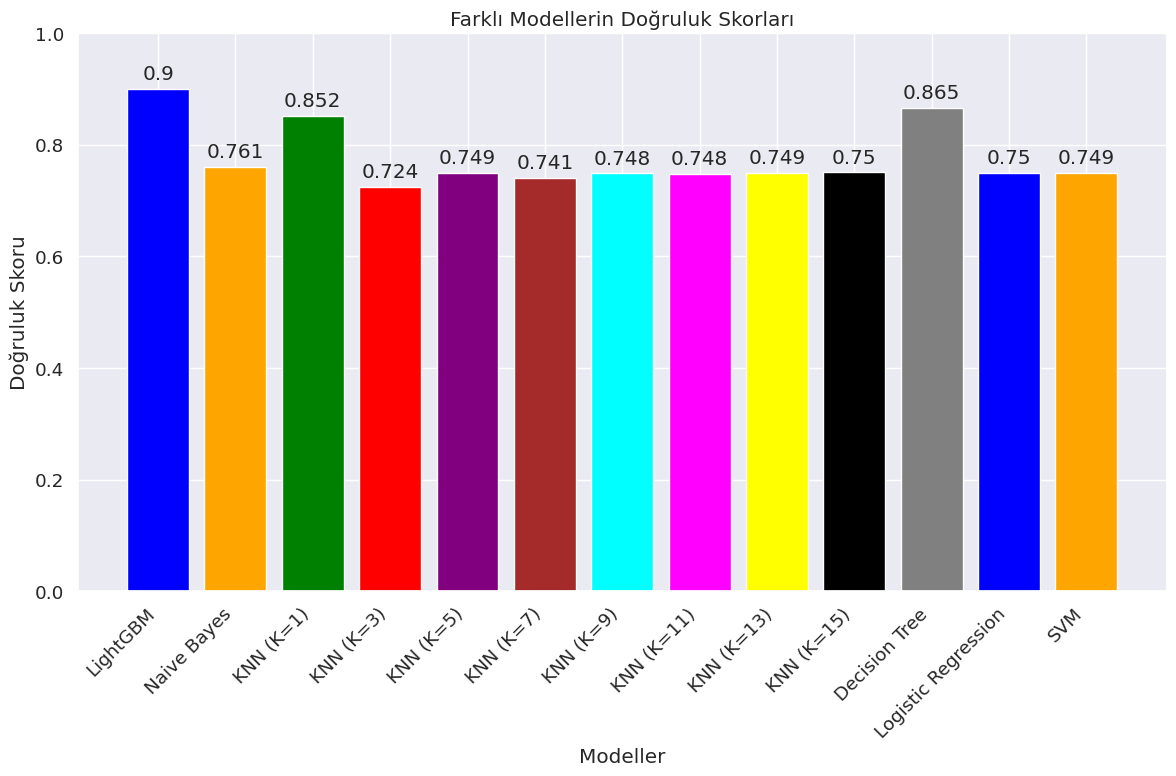

In [82]:
features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                 'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                 'count_punctuations', 'count_words_upper', 'count_words_title',
                 'count_stopwords', 'mean_word_len']]
target = data['Review_Sentiment']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Modellerin doğruluk skorlarını saklamak için bir sözlük
model_accuracies = {}

# LightGBM Modeli
clf = LGBMClassifier(
    n_estimators=10000,
    learning_rate=0.10,
    num_leaves=30,
    subsample=.9,
    max_depth=7,
    reg_alpha=.1,
    reg_lambda=.1,
    min_split_gain=.01,
    min_child_weight=2,
    silent=-1,
    verbose=-1,
)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_accuracies['LightGBM'] = accuracy_score(y_test, y_pred)

# Naive Bayes Modeli
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
model_accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred)

# K-Nearest Neighbors Modeli için farklı k değerleri
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    model_accuracies[f'KNN (K={k})'] = accuracy_score(y_test, y_pred)

# Decision Tree Modeli
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
model_accuracies['Decision Tree'] = accuracy_score(y_test, y_pred)

# Logistic Regression Modeli
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
model_accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)

# Support Vector Machine Modeli
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
model_accuracies['SVM'] = accuracy_score(y_test, y_pred)

# Sonuçları bir grafikte gösterme
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(12, 8))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'cyan', 'magenta', 'yellow', 'black', 'grey'])

plt.xlabel('Modeller')
plt.ylabel('Doğruluk Skoru')
plt.title('Farklı Modellerin Doğruluk Skorları')
plt.ylim(0, 1)

# Barların üstüne doğruluk skorlarını yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .01, round(yval, 3), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()